In [1]:
import os
import numpy as np
from tensorflow.keras import datasets
import matplotlib.pyplot as plt
from CNNModel import CNNModel
from tensorflow.keras.models import Model

Loading up training and testing dataset to grab a sample image that will be used to make the predictions and examine the patches.

In [2]:
# Load CIFAR10 training and testing datasets from Karas
_, (x_test,y_test) = datasets.cifar10.load_data()

# Normalize Pixel values to be between 0 & 1
x_test = x_test/255

img = np.array(x_test[1020])
img_label = y_test[1020]
print(img_label)

images_list = []
images_list.append(np.array(img))
x = np.asarray(images_list)

[1]


Loading Weights of Model 5

In [3]:
m_id = 5 # Model id
model_dir = os.path.abspath('Models/') + f'/{m_id}/final_weights.hdf5'

In [4]:
# Load the saved model and weights
model = CNNModel(id=m_id)()
model.load_weights(model_dir)

Extracting the output of each layer

In [5]:
layer_outputs = [layer.output for layer in model.layers] 
activation_model = Model(inputs=model.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

In [10]:
activations = activation_model.predict(x) # Returns a list of Numpy arrays: one array per layer activation

In [11]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 30, 30, 32)


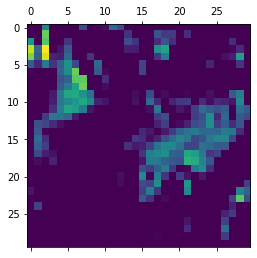

In [15]:
plt.matshow(first_layer_activation[0, :, :, 0], cmap='viridis')


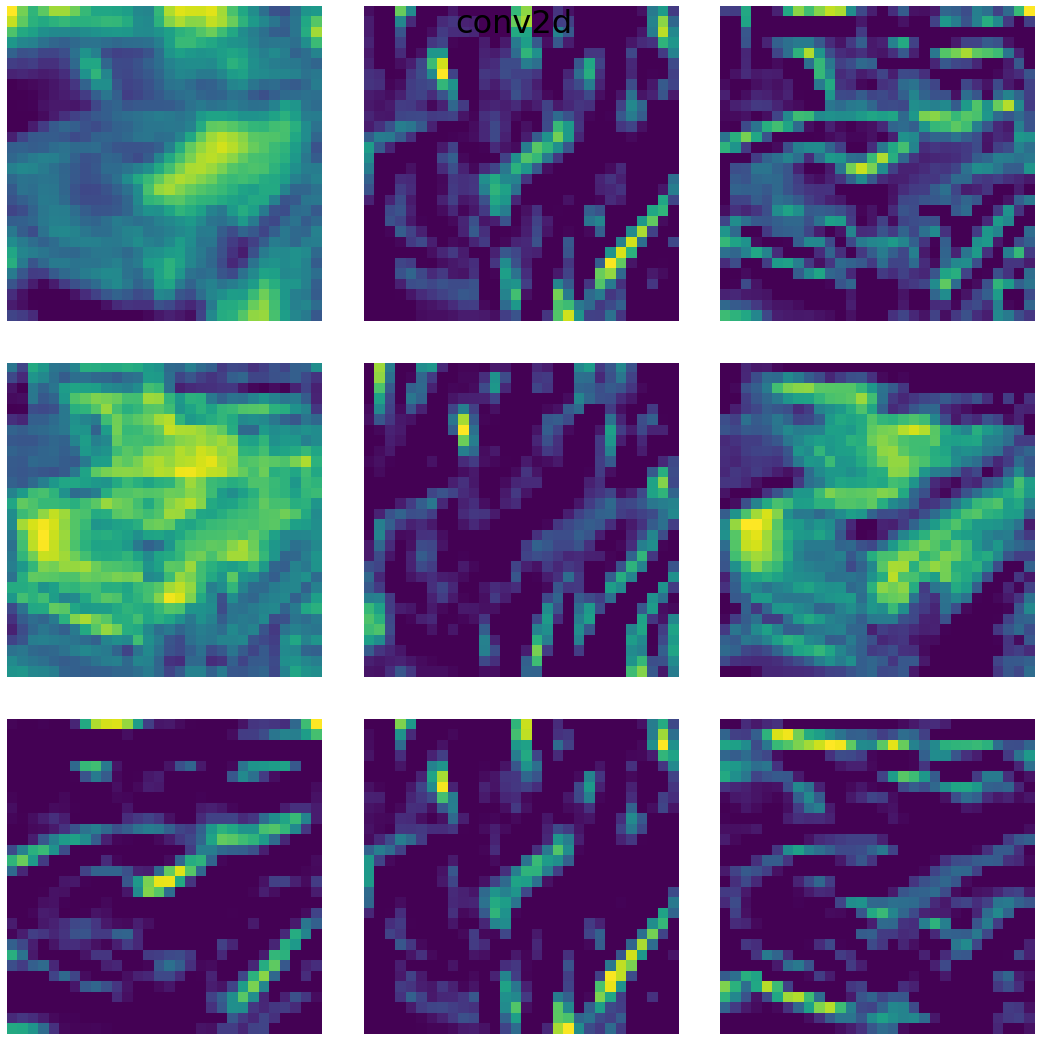

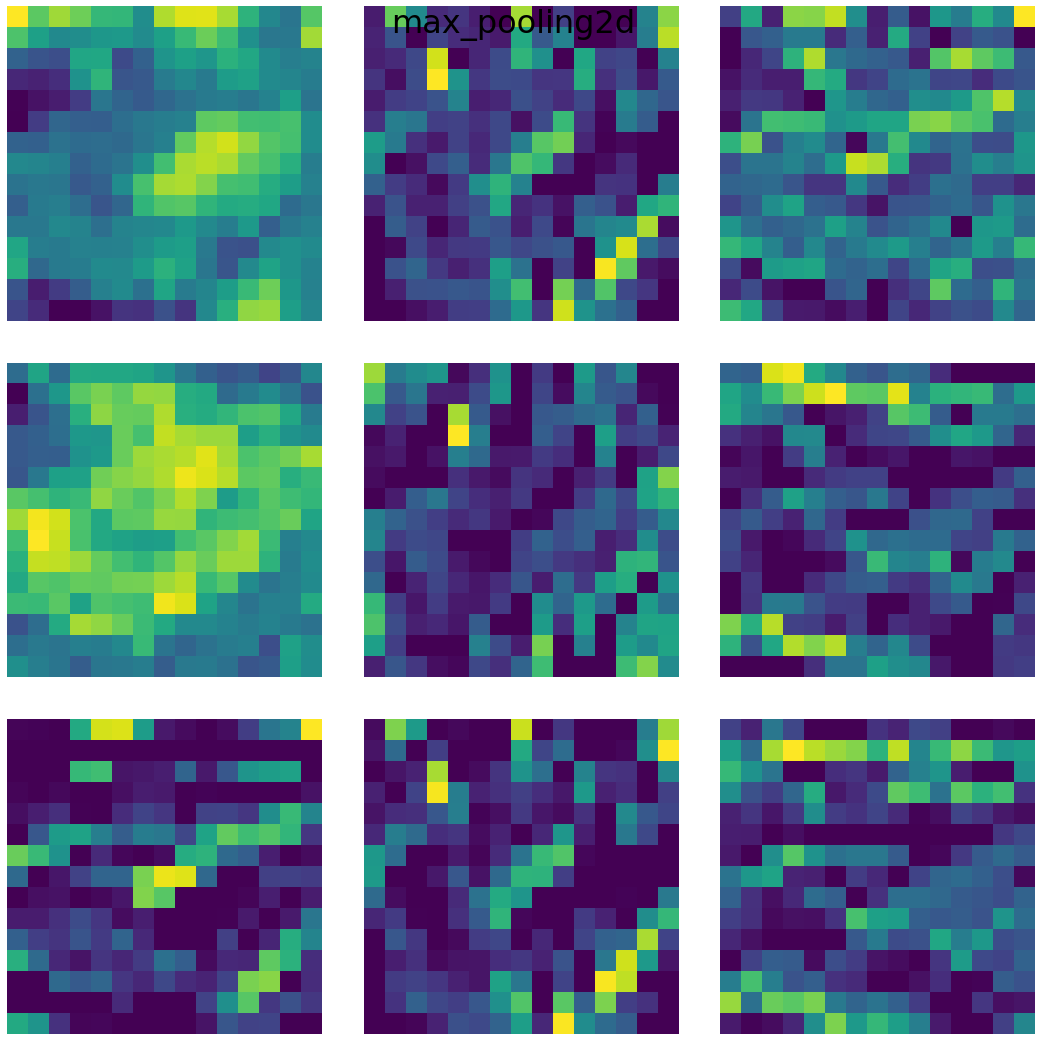

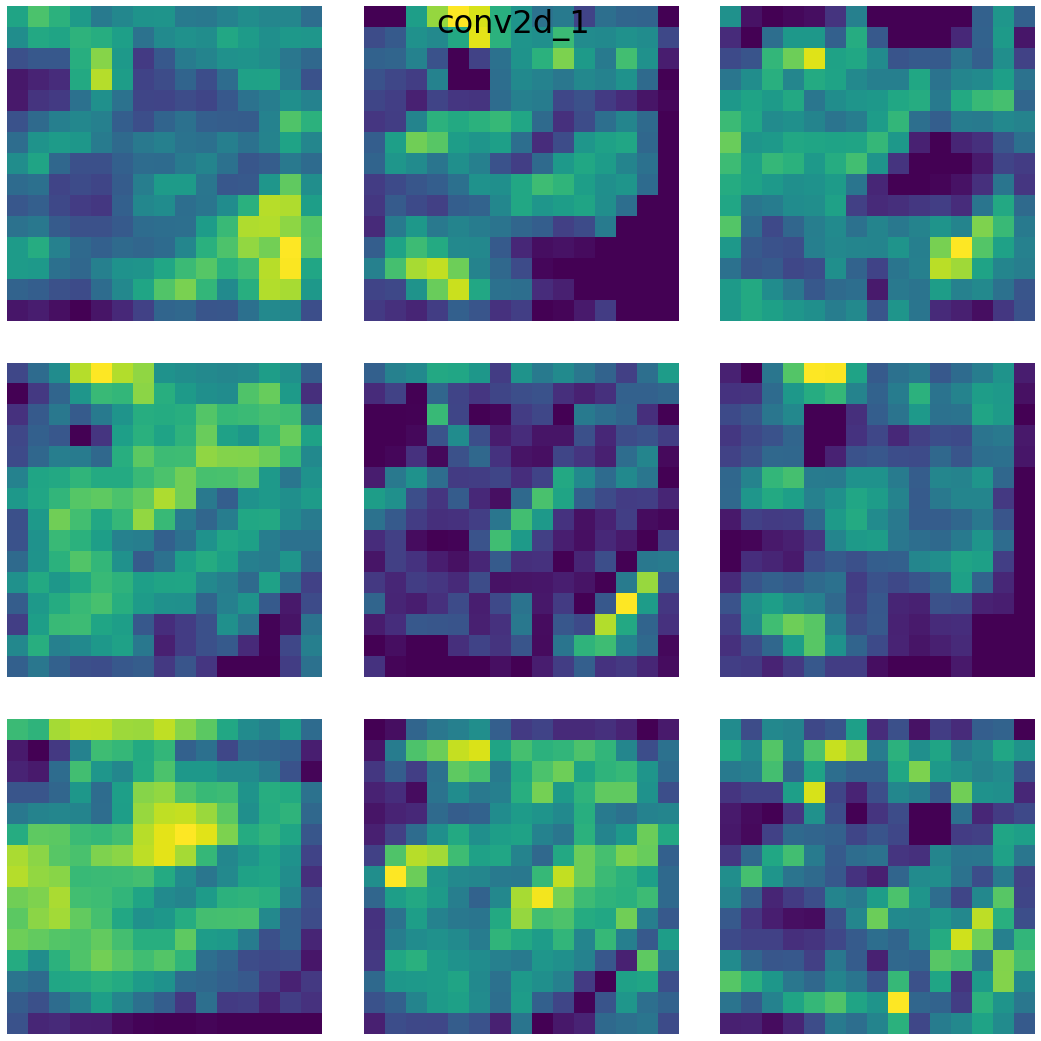

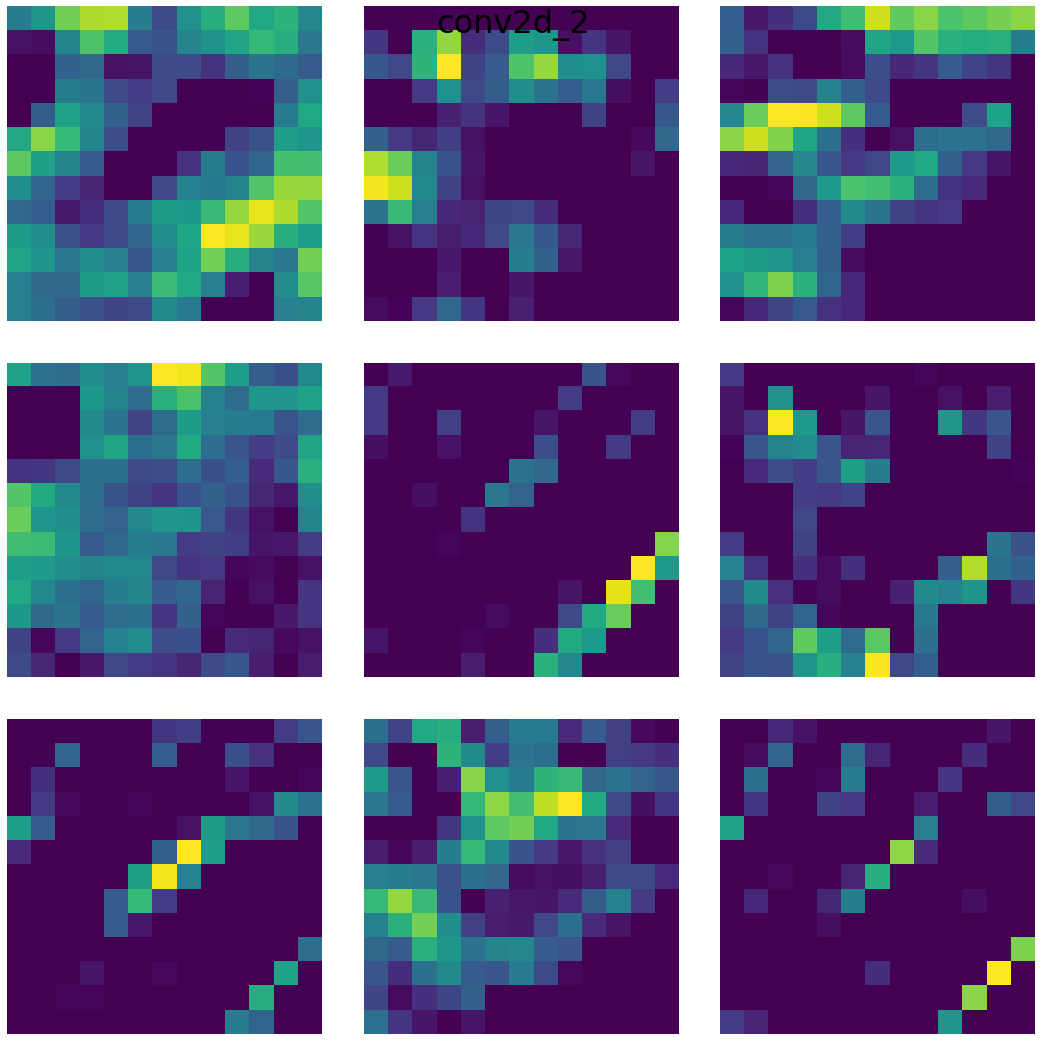

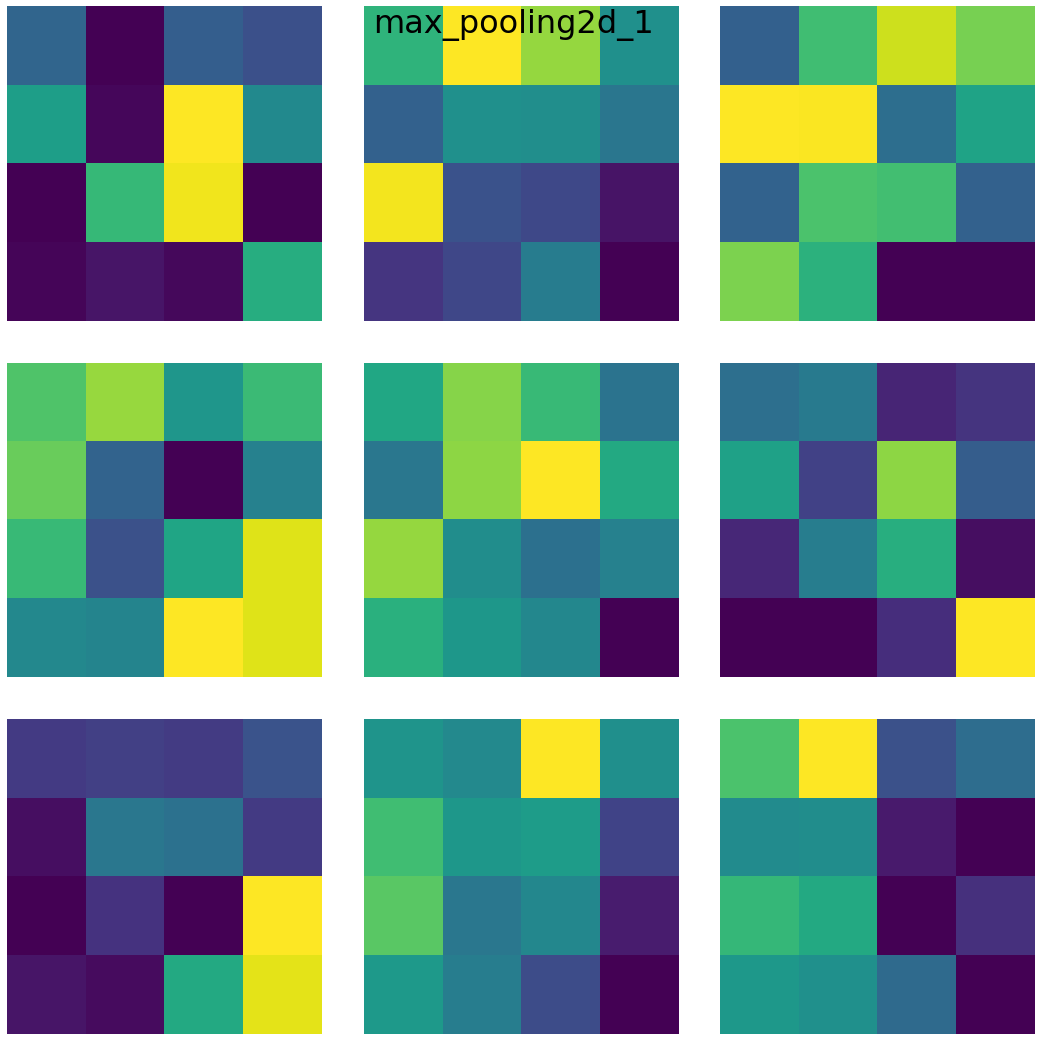

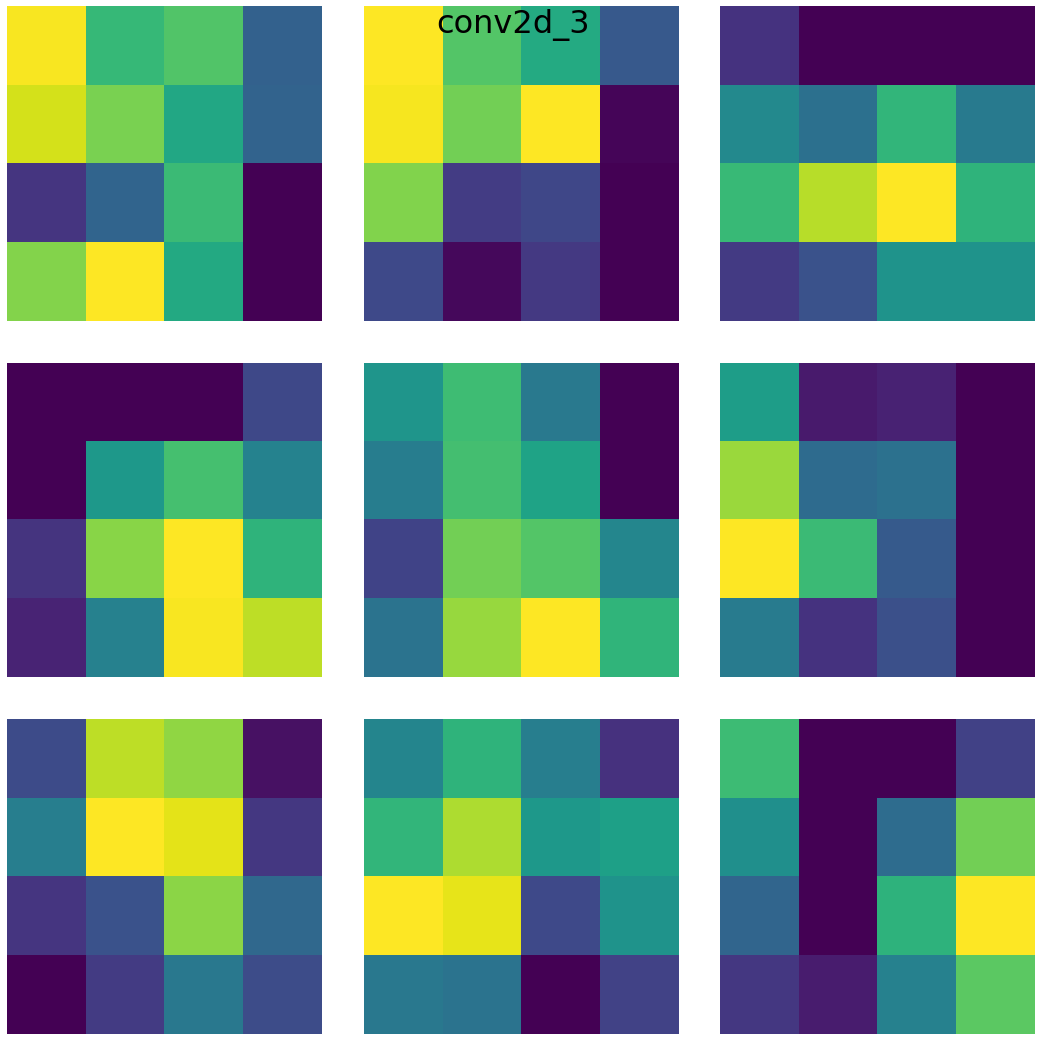

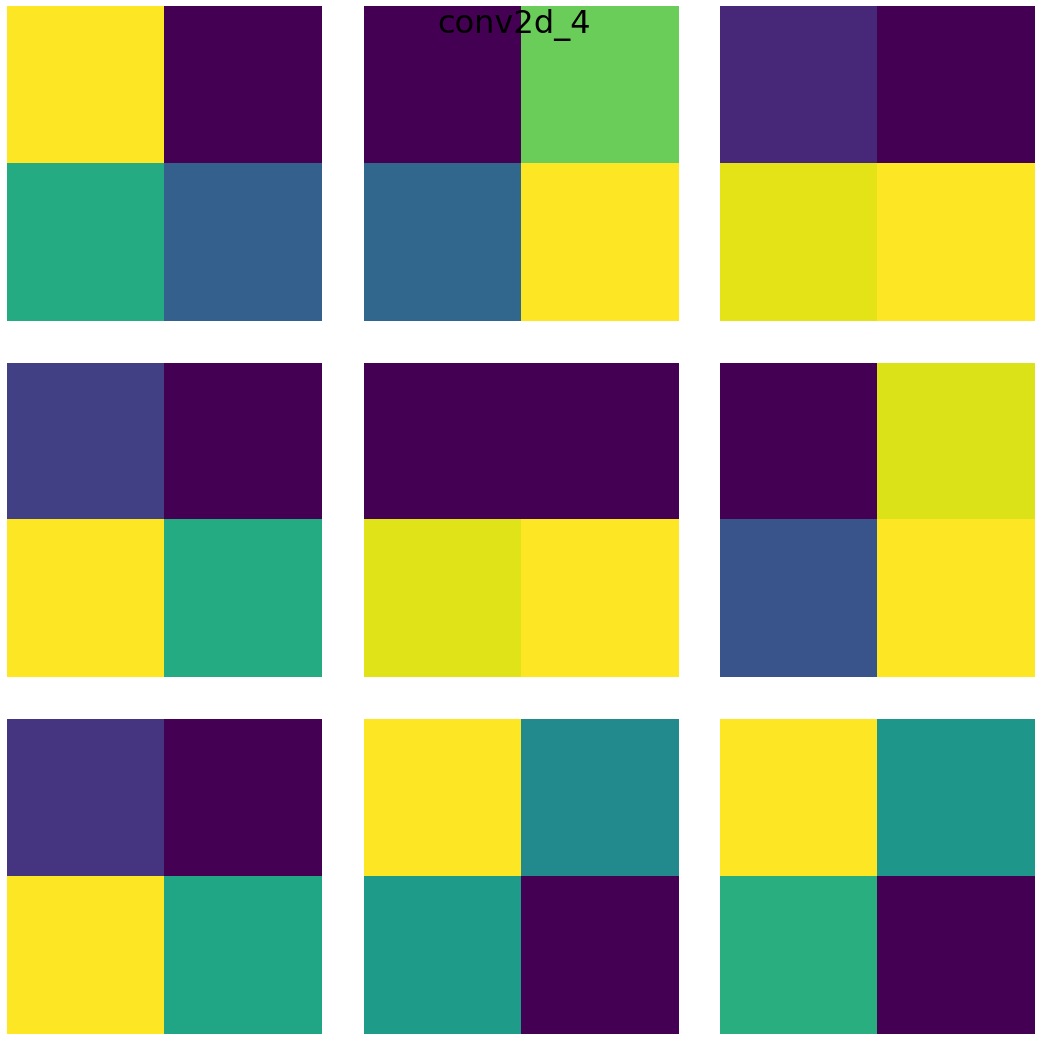

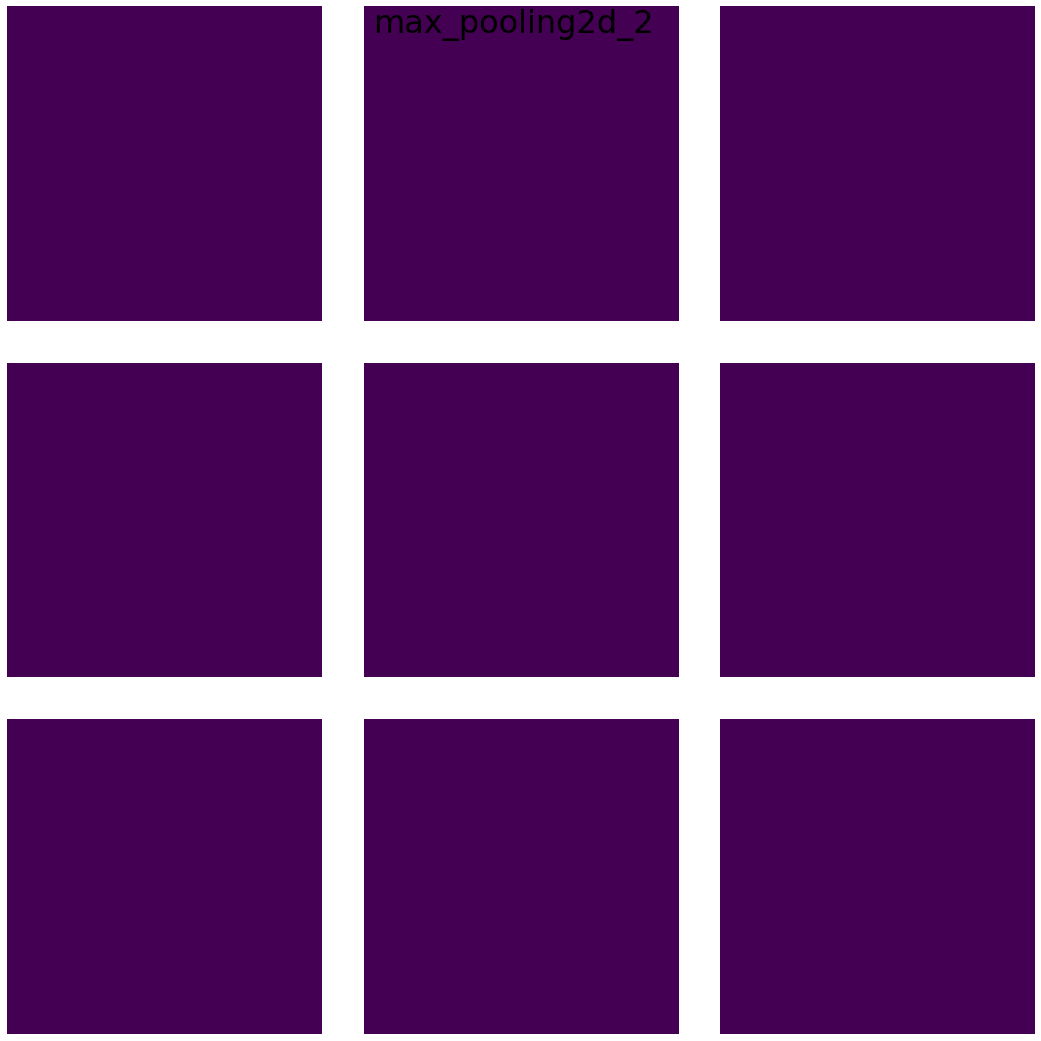

In [16]:
layer_names = [layer.name for layer in model.layers] # Names of the layers, so you can have them as part of your plot

n_rows = 3
n_cols = 3

for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).

    # Used to keep track of the most active patches. 
    # Data is stored as Tuples (patch, L2Norm(patch))
    most_active = []

    # Only look at the Conv2D and MaxPooling2D layers
    if len(layer_activation.shape) == 4 and layer_name != 'flatten':  
        for i in range(n_features):
            patch = layer_activation[0,
                                    :, :,
                                    i]

            norm = np.linalg.norm(patch) # Calculate the L2 Norm of the patch
            most_active.append((patch, norm))


               
        # Sort by the norm and keep the 9 patches with the highest value
        most_active.sort(key=lambda x: -x[1]) 
        most_active = most_active[:9]

        fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15,15))
        fig.tight_layout()

        fig.suptitle(layer_name, fontsize=32)
        for col in range(n_cols):
            for row in range(n_rows):
                patch, _ = most_active[col * n_rows + row] 
                axes[row, col].axis('off')
                axes[row, col].imshow(patch)
        


   
